In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_excel('wine.xlsx')

<br>

## Tarkastelu

<AxesSubplot:>

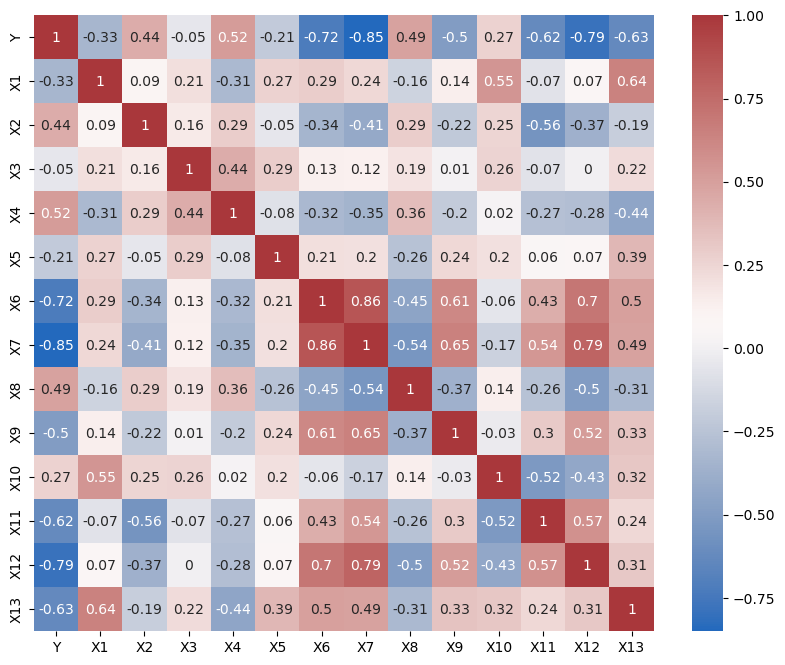

In [3]:
# Korrelaatiot
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(2), annot=True, cmap='vlag')

Valitaan korrelaatioiden perusteella selittäviksi muuttujiksi vaikka X8, X10 ja X12.

<AxesSubplot:xlabel='Y', ylabel='X10'>

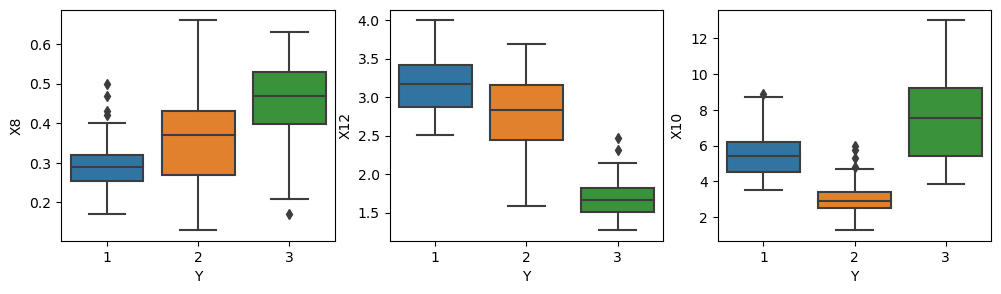

In [4]:
# tarkastellaan selittäviä arvoja
fig, axes = plt.subplots(1, 3, figsize=(12,3))

sns.boxplot(x='Y', y='X8', data=df, ax=axes[0])
sns.boxplot(x='Y', y='X12', data=df, ax=axes[1])
sns.boxplot(x='Y', y='X10', data=df, ax=axes[2])

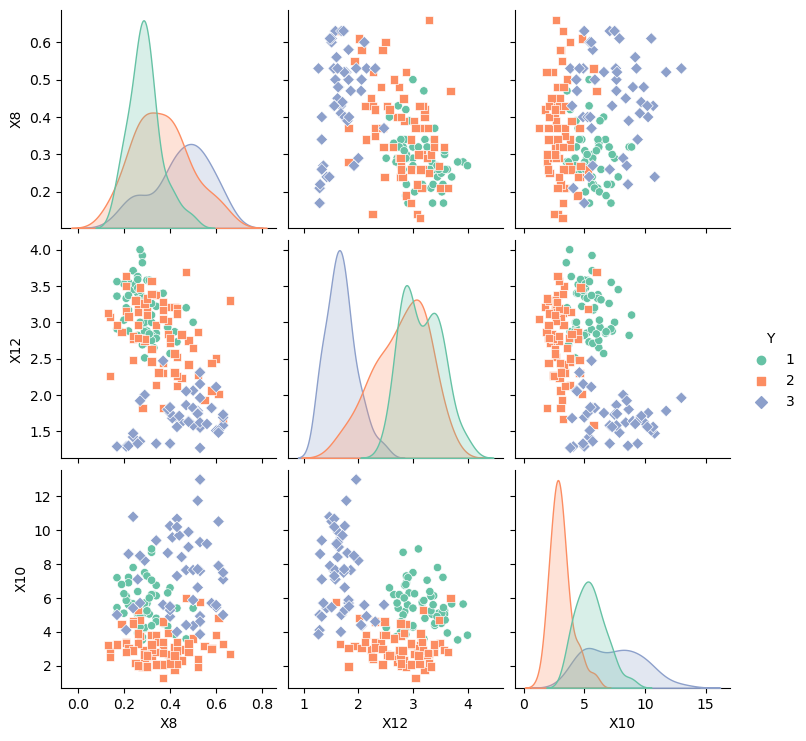

In [5]:
sns.pairplot(df[['X8', 'X12', 'X10', 'Y']], kind="scatter", hue="Y", markers=["o", "s", "D"], palette="Set2")
plt.show()

## Tasapainotus ja mallien sovittaminen

In [6]:
# selittävät muuttujat
seli = ['X8', 'X10', 'X12']
X = df[seli]

# kohdemuuttuja
y = df['Y']

# jako opetus- ja testidataan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [7]:
# mallien sovitus
lrc = LogisticRegression(solver='lbfgs', max_iter=4000)
lrc.fit(X_train, y_train)

dtc = DecisionTreeClassifier(max_depth=3, random_state=2)
dtc.fit(X_train, y_train)

rfc = RandomForestClassifier(max_depth=4, random_state=2)
rfc.fit(X_train, y_train)

gbc = GradientBoostingClassifier(max_depth=3, random_state=2)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=2)

## Mallien vertailu

In [8]:
print('Ennusteiden tarkkuus opetusdatassa:')
print(f'Logistinen regressio {lrc.score(X_train, y_train):.3f}')
print(f'Päätöspuu {dtc.score(X_train, y_train):.3f}')
print(f'Satunnaismetsä {rfc.score(X_train, y_train):.3f}')
print(f'Gradienttitehostus {gbc.score(X_train, y_train):.3f}')

Ennusteiden tarkkuus opetusdatassa:
Logistinen regressio 0.880
Päätöspuu 0.917
Satunnaismetsä 0.932
Gradienttitehostus 1.000


In [9]:
print('Ennusteiden tarkkuus testidatassa:')
print(f'Logistinen regressio {lrc.score(X_test, y_test):.3f}')
print(f'Päätöspuu {dtc.score(X_test, y_test):.3f}')
print(f'Satunnaismetsä {rfc.score(X_test, y_test):.3f}')
print(f'Gradienttitehostus {gbc.score(X_test, y_test):.3f}')

Ennusteiden tarkkuus testidatassa:
Logistinen regressio 0.933
Päätöspuu 0.933
Satunnaismetsä 0.933
Gradienttitehostus 0.911


In [10]:
y_test_dtc = dtc.predict(X_test)
y_test_lrc = lrc.predict(X_test)
y_test_rfc = rfc.predict(X_test)
y_test_gbc = gbc.predict(X_test)

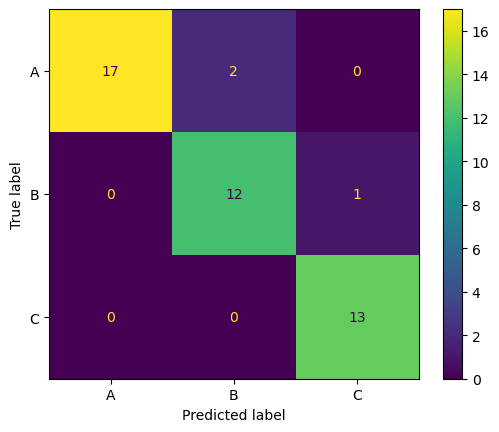

In [11]:
# Sekaannusmatriisi testidatalle, päätöspuu
cm = confusion_matrix(y_test, y_test_dtc)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C']).plot()

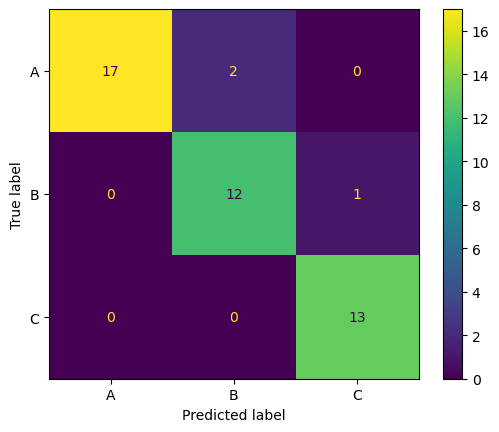

In [12]:
# Sekaannusmatriisi testidatalle, satunnaismetsä
cm = confusion_matrix(y_test, y_test_rfc)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C']).plot()

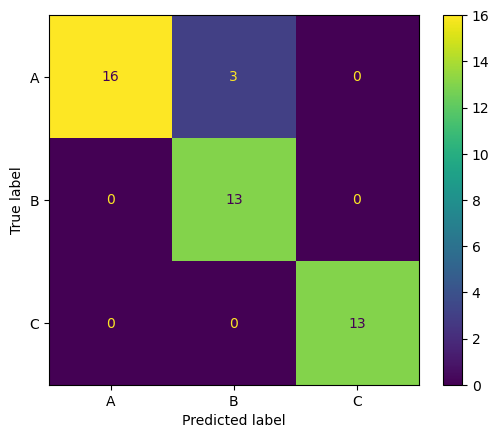

In [13]:
# Sekaannusmatriisi testidatalle, logistinen regressio
cm = confusion_matrix(y_test, y_test_lrc)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C']).plot()

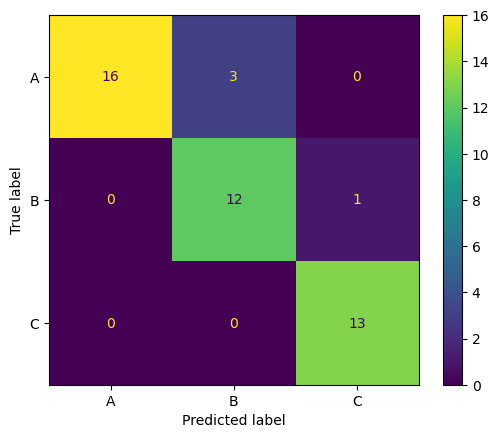

In [14]:
# Sekaannusmatriisi testidatalle, gradienttitehostus
cm = confusion_matrix(y_test, y_test_gbc)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C']).plot()

Gradienttitehostuksella virheitä tuli 4, muilla malleilla 3. 

<br>

## Ennustaminen

In [15]:
# tehdään funktio jolla luodaan data uusille viineille
import random

def uusi_data(luku: int):
    list_1 = []

    for x in range(luku):
        list_2 = []
        
        for y in range(3):
            # pysytään jokaisen kolumnin min ja max arvojen sisällä, jotta saataisiin C-viinejä myös
            titl = seli[y]
            mini = df[titl].min()
            maxi = df[titl].max()
            z = round(random.uniform(mini, maxi), 6)
            list_2.append(z)
            
        list_1.append(list_2)

    Xnew = pd.DataFrame(list_1, columns = seli)
    return Xnew

In [16]:
Xnew = uusi_data(5)
Xnew

,X8,X10,X12
0,0.570238,3.616013,2.304036
1,0.137517,11.165885,2.906783
2,0.215919,11.846897,1.806789
3,0.398647,12.080896,3.312099
4,0.223254,4.513383,2.898536


### Päätöspuu

In [17]:
# ennustetaan!
ennuste = dtc.predict(Xnew)
todnak = dtc.predict_proba(Xnew).round(2)

X1 = Xnew.copy()
X1['ennuste'] = ennuste
X1[['tn_A', 'tn_B', 'tn_C']] = todnak
X1

,X8,X10,X12,ennuste,tn_A,tn_B,tn_C
0,0.570238,3.616013,2.304036,2,0.00,1.00,0.0
1,0.137517,11.165885,2.906783,1,0.94,0.06,0.0
2,0.215919,11.846897,1.806789,3,0.00,0.00,1.0
3,0.398647,12.080896,3.312099,1,0.94,0.06,0.0
4,0.223254,4.513383,2.898536,1,0.60,0.40,0.0


### Satunnaismetsä

In [18]:
ennuste = rfc.predict(Xnew)
todnak = rfc.predict_proba(Xnew).round(2)

X2 = Xnew.copy()
X2['ennuste'] = ennuste
X2[['tn_A', 'tn_B', 'tn_C']] = todnak
X2

,X8,X10,X12,ennuste,tn_A,tn_B,tn_C
0,0.570238,3.616013,2.304036,2,0.05,0.80,0.15
1,0.137517,11.165885,2.906783,1,0.68,0.25,0.07
2,0.215919,11.846897,1.806789,3,0.10,0.12,0.79
3,0.398647,12.080896,3.312099,1,0.56,0.29,0.15
4,0.223254,4.513383,2.898536,1,0.66,0.31,0.02


### Logistinen regressio

In [19]:
ennuste = lrc.predict(Xnew)
todnak = lrc.predict_proba(Xnew).round(2)

X3 = Xnew.copy()
X3['ennuste'] = ennuste
X3[['tn_A', 'tn_B', 'tn_C']] = todnak
X3

,X8,X10,X12,ennuste,tn_A,tn_B,tn_C
0,0.570238,3.616013,2.304036,2,0.08,0.83,0.09
1,0.137517,11.165885,2.906783,1,0.86,0.00,0.14
2,0.215919,11.846897,1.806789,3,0.06,0.00,0.94
3,0.398647,12.080896,3.312099,1,0.96,0.00,0.04
4,0.223254,4.513383,2.898536,1,0.53,0.42,0.05


### Gradienttitehostus

In [20]:
ennuste = gbc.predict(Xnew)
todnak = gbc.predict_proba(Xnew).round(2)

X4 = Xnew.copy()
X4['ennuste'] = ennuste
X4[['tn_A', 'tn_B', 'tn_C']] = todnak
X4

,X8,X10,X12,ennuste,tn_A,tn_B,tn_C
0,0.570238,3.616013,2.304036,2,0.00,1.00,0.0
1,0.137517,11.165885,2.906783,1,0.99,0.01,0.0
2,0.215919,11.846897,1.806789,3,0.00,0.00,1.0
3,0.398647,12.080896,3.312099,1,1.00,0.00,0.0
4,0.223254,4.513383,2.898536,2,0.09,0.91,0.0


Gradienttitehostus ennusti muista malleista poiketen viimeisen viinin B:ksi.